# DNN math(딥러닝수학)
## 2022.3.19 @Yeji Choi  

### Python 기초 Class 설명
- 파이썬의 클래스는 객체를 만드는 도구
  - 데이터의 속성(객체를 표현하는 데이터)과 메소드(객체의 행동을 구현)를 정의할 수 있음

  ex) 강아지 클래스의 속성은 나이, 색, 종류, 이름이며, 메소드는 짖기, 달리기, 꼬리 흔들기 등을 의미함

In [16]:
class Dog:
  def wag_tail(self):
    print('The dog is wagging its tail')

In [17]:
happy = Dog()
happy.wag_tail()

The dog is wagging its tail


In [18]:
hope = Dog()
hope.wag_tail()

The dog is wagging its tail


In [21]:
id(happy), type(happy)

(139709726275664, __main__.Dog)

In [22]:
id(hope), type(hope)

(139709725832848, __main__.Dog)

In [23]:
class Dog:
  def wag_tail(self):
    print('The dog is wagging its tail')
  def bark(self):
    print('The dog is barking')

In [24]:
happy = Dog()
happy.bark()

The dog is barking


In [36]:
class Dog:
  def __init__(self, name, age):
    self.name = name
    self.age = age

  def wag_tail(self):
    print('{} is wagging its tail'.format(self.name))

  def introduce(self):
    print("My name is {} and {} years old".format(self.name, self.age))

In [38]:
x = Dog('Happy',2)
y = Dog('Hope', 3)

In [33]:
x.wag_tail()

Happy is wagging its tail


In [40]:
x.introduce()

My name is Happy and 2 years old


## 1. 1943 논리게이트 (맥컬록과 월터피츠의 뉴런모델)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
x = np.array([0.1, 0.2])
w = np.array([0.3, 0.4])

In [4]:
z = np.sum(x*w)
z

0.11000000000000001

In [5]:
b = 0.3
y = 1 if z > b else -1

In [6]:
y

-1

- 논리회로

In [7]:
def test(logic):
    for x1, x2 in [(0, 0), (0, 1), (1, 0), (1, 1)]:
        y = logic(x1, x2)
        print(x1, x2, '|', y)

In [13]:
def 취합(x, w, b):
    z = np.sum(x*w) + b
    return z

def 활성화(z):
    y = 1 if z > 0 else 0
    return y


In [14]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    # MCP 뉴런
    z = 취합(x, w, b)
    y = 활성화(z)
    return y

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    z = 취합(x, w, b)
    y = 활성화(z)
    return y

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    z = 취합(x, w, b)
    y = 활성화(z)
    return y

In [15]:
test(AND)

0 0 | 0
0 1 | 0
1 0 | 0
1 1 | 1


In [11]:
test(NAND)

0 0 | 1
0 1 | 1
1 0 | 1
1 1 | 0


In [12]:
test(OR)

0 0 | 0
0 1 | 1
1 0 | 1
1 1 | 1


## 2. 1958 퍼셉트론, 아달라인

In [42]:
def 취합(X, w, b):
    z = np.dot(X, w) + b
    return z

def 활성화(z):
    y = np.where(z > 0, 1, -1)
    return y

class 뉴런:
    def __init__(self, w, b):
        self.w = w
        self.b = b
        
    def predict(self, x):
        z = 취합(x, self.w, self.b)
        y = 활성화(z)
        return y

In [43]:
class 퍼셉트론(뉴런):
    def __init__(self):
        super().__init__(w=None, b=None)
    
    def fit(self, X, y, 학습횟수, 학습률=0.01):
        # 가중치 초기화
        샘플수, 특징수 = X.shape
        self.w = np.zeros(특징수)
        self.b = 0.0
        
        error_history = []
        for i in range(학습횟수):
            종합오류 = 0
            for xi, yi in zip(X, y):
                yi_pred = self.predict(xi)
                error = yi - yi_pred
                종합오류 += error**2
                # 가중치 갱신
                update = error * 학습률
                
                self.w += update * xi
                self.b += update 
            
            error_history.append(종합오류)
            print("weight & bias :", self.w, self.b)
        return error_history

In [45]:
iris = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris.data', header=None)

In [46]:
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
data1 = iris[:100]
data1[4].value_counts()

Iris-setosa        50
Iris-versicolor    50
Name: 4, dtype: int64

In [48]:
y = data1[4].values
X = data1.iloc[:, 0:4].values.astype('float')

In [49]:
y = np.where(y == 'Iris-setosa', 1, -1)

In [50]:
np.unique(y,return_counts=True)

(array([-1,  1]), array([50, 50]))

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [53]:
model = 퍼셉트론()

In [54]:
error_history = model.fit(X_train, y_train, 학습횟수=10)

weight & bias : [ 0.028  0.05  -0.094 -0.046] 0.02
weight & bias : [ 0.028  0.05  -0.094 -0.046] 0.02
weight & bias : [ 0.028  0.05  -0.094 -0.046] 0.02
weight & bias : [ 0.028  0.05  -0.094 -0.046] 0.02
weight & bias : [ 0.028  0.05  -0.094 -0.046] 0.02
weight & bias : [ 0.028  0.05  -0.094 -0.046] 0.02
weight & bias : [ 0.028  0.05  -0.094 -0.046] 0.02
weight & bias : [ 0.028  0.05  -0.094 -0.046] 0.02
weight & bias : [ 0.028  0.05  -0.094 -0.046] 0.02
weight & bias : [ 0.028  0.05  -0.094 -0.046] 0.02


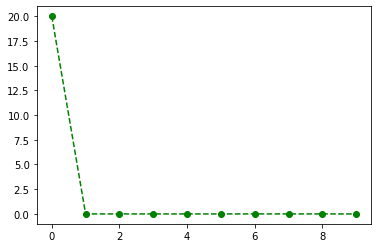

In [55]:
plt.plot(error_history, color='g', marker='o', linestyle='--')
plt.show()

In [56]:
model.w, model.b

(array([ 0.028,  0.05 , -0.094, -0.046]), 0.02)

In [57]:
y_pred = model.predict(X_test)

In [58]:
np.mean(y_pred == y_test)

1.0

In [59]:
data2 = iris[50:]
data2[4].value_counts()

Iris-versicolor    50
Iris-virginica     50
Name: 4, dtype: int64

In [60]:
y = data2[4]
y = np.where(y == 'Iris-virginica', 1, -1)

In [61]:
X = data2.iloc[:, 0:4].values.astype('float')

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [63]:
model = 퍼셉트론()

In [64]:
error_history = model.fit(X_train, y_train, 학습횟수=10)

weight & bias : [-0.202 -0.13   0.096  0.118] -0.08
weight & bias : [-0.244 -0.186  0.194  0.208] -0.12000000000000001
weight & bias : [-0.32  -0.216  0.2    0.256] -0.14
weight & bias : [-0.266 -0.21   0.366  0.372] -0.16
weight & bias : [-0.37  -0.276  0.282  0.352] -0.18
weight & bias : [-0.35  -0.304  0.37   0.434] -0.19999999999999998
weight & bias : [-0.396 -0.348  0.438  0.512] -0.23999999999999996
weight & bias : [-0.432 -0.396  0.502  0.568] -0.27999999999999997
weight & bias : [-0.468 -0.444  0.566  0.624] -0.32
weight & bias : [-0.512 -0.472  0.6    0.674] -0.34


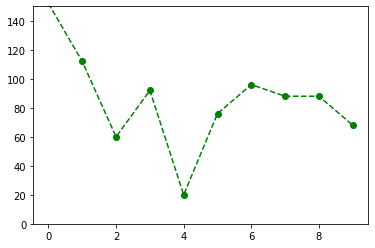

In [65]:
plt.plot(error_history, 'go--')
plt.ylim(0, 150)
plt.show()

In [66]:
y_pred = model.predict(X_test)

In [67]:
np.mean(y_pred == y_test)

0.52

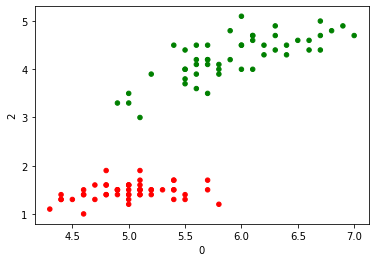

In [68]:
colormap = np.where(data1[4] == 'Iris-setosa', 'r', 'g')
data1.plot(kind='scatter', x=0, y=2, c=colormap)
plt.show()

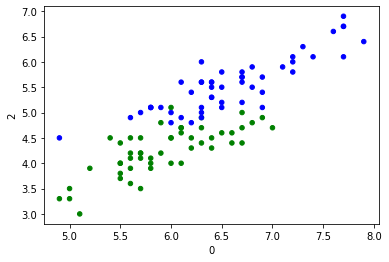

In [69]:
colormap = np.where(data2[4] == 'Iris-versicolor', 'g', 'b')
data2.plot(kind='scatter', x=0, y=2, c=colormap)
plt.show()

## 3. 활성화 함수

In [70]:
def step(x):
    return np.where(x > 0, 1, -1)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

In [71]:
x = np.arange(-5, 5, 0.1)

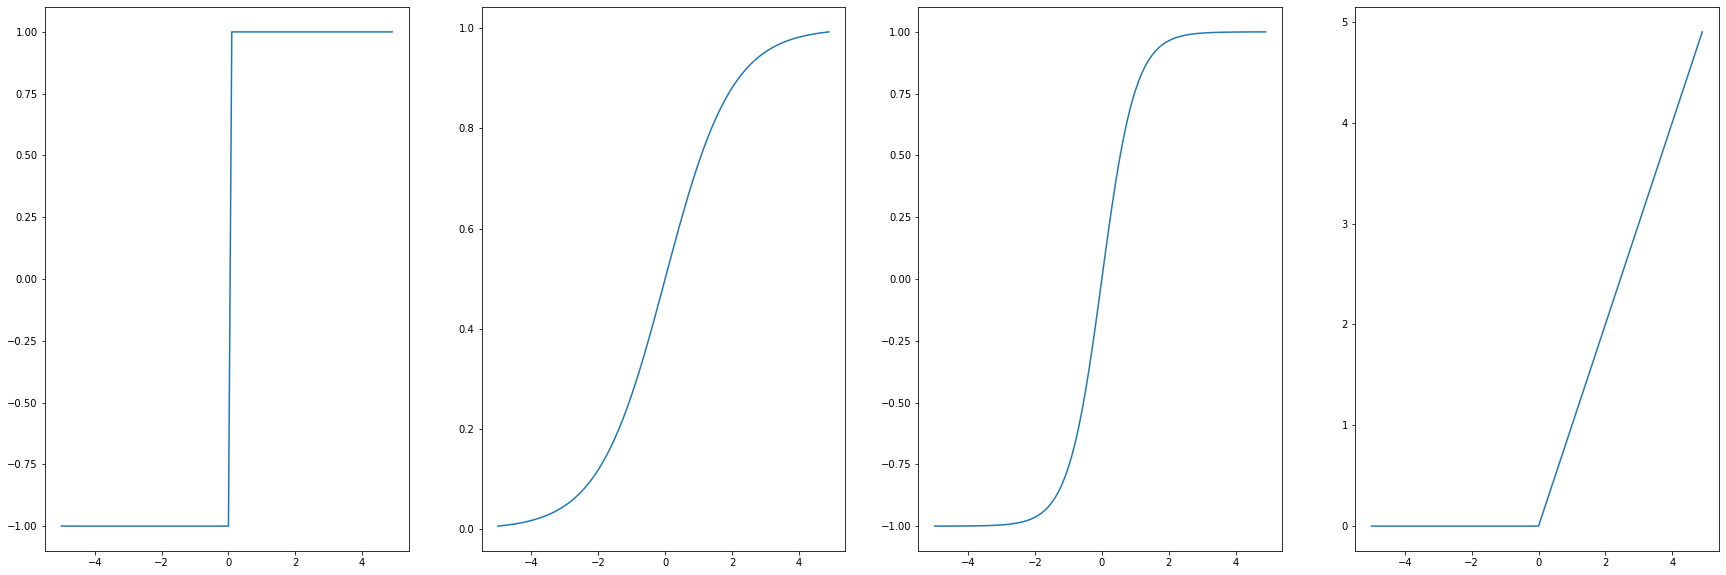

In [72]:
fig, axes = plt.subplots(1, 4, figsize=(30, 10))
axes[0].plot(x, step(x))
axes[1].plot(x, sigmoid(x))
axes[2].plot(x, np.tanh(x))
axes[3].plot(x, relu(x))

plt.show()

## 4. 신경망 순전파  

입력으로부터 출력이 전달되는 것: 순전파(feed forward)

In [84]:
x = np.array([1.0, 0.5]) #(1x2)

In [85]:
W1 = np.array([[0.1, 0.3, 0.5],
               [0.2, 0.4, 0.6]])  #node 3개 (2x3)

In [86]:
b1 = np.array([0.1, 0.2, 0.3])   

In [87]:
z1 = np.dot(x, W1) + b1
z1

array([0.3, 0.7, 1.1])

In [88]:
a1 = sigmoid(z1)
a1

array([0.57444252, 0.66818777, 0.75026011])

In [89]:
W2 = np.array([[0.1, 0.4], 
               [0.2, 0.5], 
               [0.3, 0.6]])  #(3x2) 노드 3개, 출력 2개
b2 = np.array([0.1, 0.2])

In [90]:
z2 = np.dot(a1, W2) + b2
z2

array([0.51615984, 1.21402696])

In [91]:
a2 = sigmoid(z2)
a2

array([0.62624937, 0.7710107 ])

In [92]:
W3 = np.array([[0.1, 0.3], 
               [0.2, 0.4]])
b3 = np.array([0.1, 0.2])

In [93]:
z3 = np.dot(a2, W3) + b3
z3

array([0.31682708, 0.69627909])